<a href="https://colab.research.google.com/github/teemkwong/MachineLearning/blob/master/nlp_work_1_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This nlp work followed the idea from the below URL to cluster the universities and institutions names.
https://github.com/dipanjanS/adv_nlp_workshop_odsc_europe22/blob/main/01_Text_Representation_Word_Embedding_Models.ipynb

# Here is the idea as follows:

1.	Tokenized the name by removing noises, such as special characters, extra whitespaces, digits, stop words and converting all remaining characters to lowercase.
2.	Create word embedding representations by using Word2vec algorithm from Gensim library. It is a predictive deep learning-based model to compute and generate high quality, distributed and continuous dense vector representations of words, which capture contextual and semantic similarity. I can use the cosine similarity to indicate the level of semantic similarity between the word vectors.
3.	Create name level embedding by summing up all corresponding word level embeddings.
4.	Cluster all name level embedding using an unsupervised clustering algorithm called Affinity Propagation algorithm.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# visualize embeddings
from sklearn.manifold import TSNE

pd.options.display.max_colwidth = 200

docs = pd.read_csv('doc_2022.csv')
corpus = docs['affilname']

split_corpus = corpus.str.split('|')
np_corpus = split_corpus.to_numpy()
flatten_corpus = np.hstack(np_corpus)
flatten_corpus = np.unique(flatten_corpus)

corpus_df = pd.DataFrame({'Document': flatten_corpus})
corpus_df

,Document
0,4Paradigm Inc.
1,"A-Star, Genome Institute of Singapore"
2,"A-Star, Institute of High Performance Computing"
3,"A-Star, Institute of Microelectronics"
4,"A-Star, Institute of Molecular and Cell Biology"
...,...
1787,École Normale Supérieure
1788,École des hautes études commerciales de Paris
1789,Écoles polytechniques fédérales
1790,İstanbul Teknik Üniversitesi


In [ ]:
import nltk
import re

nltk.download('stopwords')
nltk.download('punkt')

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, flags=re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

norm_corpus = normalize_corpus(flatten_corpus)
norm_corpus

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


array(['paradigm inc', 'astar genome institute singapore',
       'astar institute high performance computing', ...,
       'coles polytechniques fdrales', 'stanbul teknik niversitesi',
       'coala naional de studii politice administrative'], dtype='<U108')

In [ ]:
tokenized_corpus = [nltk.word_tokenize(doc) for doc in norm_corpus]
tokenized_corpus

[['paradigm', 'inc'],
 ['astar', 'genome', 'institute', 'singapore'],
 ['astar', 'institute', 'high', 'performance', 'computing'],
 ['astar', 'institute', 'microelectronics'],
 ['astar', 'institute', 'molecular', 'cell', 'biology'],
 ['astar', 'singapore', 'institute', 'clinical', 'sciences'],
 ['astar', 'singapore', 'institute', 'manufacturing', 'technology'],
 ['aecom', 'technology', 'corporation', 'hong', 'kong'],
 ['agh', 'university', 'science', 'technology'],
 ['aie', 'institute'],
 ['airs'],
 ['aitrics', 'co', 'ltd'],
 ['anu', 'college', 'health', 'amp', 'medicine'],
 ['avic', 'aerodynamics', 'research', 'institute'],
 ['aalborg', 'university'],
 ['aalto', 'university'],
 ['aarhus', 'universitet'],
 ['abdus', 'salam', 'international', 'centre', 'theoretical', 'physics'],
 ['academia', 'sinica', 'institute', 'physics'],
 ['academia', 'sinica', 'institute', 'sociology'],
 ['academia',
  'sinica',
  'research',
  'center',
  'humanities',
  'social',
  'sciences'],
 ['academy', 'sc

In [ ]:
import gensim
gensim.__version__

'3.6.0'

# Robust Word2Vec Model with Gensim

In [ ]:
from gensim.models import word2vec

# Set values for various parameters
feature_size = 300    # Word vector dimensionality  every word -> [......] -> 15
window_context = 5   # Context window size
min_word_count = 1   # Minimum word count
sg = 1               # skip-gram model if sg = 1 and CBOW if sg = 0

w2v_model = word2vec.Word2Vec(tokenized_corpus,
                              size=feature_size,
                              window=window_context,
                              min_count = min_word_count,
                              sg=sg, iter=300)
print(w2v_model)

Word2Vec(vocab=2138, size=300, alpha=0.025)


In [ ]:
# print(w2v_model.wv['university'])
print(len(w2v_model.wv.index2word))

2138


# Looking at term semantic similarity

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

words = w2v_model.wv.index2word
wvs = w2v_model.wv[words]

vec_df = pd.DataFrame(wvs, index=words)

similarity_matrix = cosine_similarity(vec_df.values)
similarity_df = pd.DataFrame(similarity_matrix, index=words, columns=words)
similarity_df

,university,institute,technology,school,sciences,research,science,laboratory,national,hospital,...,commerciales,coles,polytechniques,fdrales,stanbul,teknik,coala,naional,studii,politice
university,1.000000,0.099816,0.194680,0.144920,0.147904,0.149218,0.170346,0.129204,0.187743,0.237957,...,0.002421,0.055392,0.033528,0.031047,0.083113,0.093866,0.077663,0.079058,0.086248,0.094652
institute,0.099816,1.000000,0.318959,0.215234,0.270560,0.327566,0.220154,0.185240,0.173130,0.158276,...,0.134445,0.105390,0.103529,0.106308,0.131191,0.157891,0.053295,0.060373,0.057601,0.059312
technology,0.194680,0.318959,1.000000,0.136530,0.195935,0.207820,0.443674,0.242731,0.161871,0.256700,...,0.084289,0.002998,0.020662,-0.003703,0.064953,0.088647,0.056530,0.063192,0.062952,0.067964
school,0.144920,0.215234,0.136530,1.000000,0.329839,0.245832,0.192578,0.133107,0.116028,0.195884,...,0.117609,0.217431,0.170269,0.197923,0.195417,0.194970,0.106523,0.110003,0.115662,0.113147
sciences,0.147904,0.270560,0.195935,0.329839,1.000000,0.215065,0.364742,0.202478,0.266291,0.241150,...,0.418375,0.118446,0.093673,0.122233,0.029972,0.062989,0.157253,0.157042,0.150740,0.150529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
teknik,0.093866,0.157891,0.088647,0.194970,0.062989,0.056317,0.032991,0.145231,-0.018610,0.141038,...,0.588925,0.900565,0.900118,0.898352,0.990028,1.000000,0.548830,0.537955,0.544823,0.536446
coala,0.077663,0.053295,0.056530,0.106523,0.157253,0.058022,0.114672,0.159055,0.228618,0.377602,...,0.652679,0.581015,0.546821,0.599969,0.551191,0.548830,1.000000,0.998535,0.997500,0.996663
naional,0.079058,0.060373,0.063192,0.110003,0.157042,0.064685,0.120103,0.152369,0.228029,0.384993,...,0.653199,0.567306,0.533707,0.586313,0.540954,0.537955,0.998535,1.000000,0.998989,0.998083
studii,0.086248,0.057601,0.062952,0.115662,0.150740,0.064698,0.122559,0.151447,0.225132,0.388490,...,0.643968,0.571916,0.538758,0.591086,0.548128,0.544823,0.997500,0.998989,1.000000,0.998996


In [ ]:
feature_names = np.array(words)
similarity_df.apply(lambda row: feature_names[np.argsort(-row.values)[1:5]], 
                    axis=1)

# T-distributed Stochastic Neighbor Embedding


> https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html









In [ ]:
words = w2v_model.wv.index2word
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=42, n_iter=250, perplexity=5)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

# Robust FastText Model with Gensim

In [ ]:
from gensim.models.fasttext import FastText

# Set values for various parameters
feature_size = 300   # Word vector dimensionality
window_context = 5   # Context window size
min_word_count = 1   # Minimum word count
sg = 1               # skip-gram model

ft_model = FastText(tokenized_corpus,
                    size=feature_size,
                    window=window_context,
                    min_count = min_word_count,
                    sg=sg, iter=300)
print(ft_model)

FastText(vocab=1894, size=300, alpha=0.025)


In [ ]:
# print(ft_model.wv['university'])
print(ft_model.wv.index2word)

['university', 'institute', 'technology', 'research', 'sciences', 'school', 'science', 'laboratory', 'national', 'de', 'academy', 'engineering', 'chinese', 'hospital', 'center', 'college', 'medicine', 'medical', 'state', 'china', 'key', 'business', 'shenzhen', 'kong', 'hong', 'beijing', 'physics', 'zhejiang', 'ltd', 'guangdong', 'di', 'universit', 'normal', 'shanghai', 'universidad', 'co', 'faculty', 'economics', 'health', 'centre', 'department', 'international', 'management', 'universidade', 'universitt', 'materials', 'ministry', 'limited', 'innovation', 'information', 'guangzhou', 'environmental', 'south', 'education', 'advanced', 'energy', 'provincial', 'inc', 'technologies', 'chemistry', 'marine', 'peking', 'nanjing', 'social', 'cancer', 'london', 'applied', 'lab', 'chemical', 'california', 'central', 'finance', 'agricultural', 'institut', 'texas', 'joint', 'federal', 'tokyo', 'indian', 'korea', 'paris', 'nazionale', 'technical', 'graduate', 'peoples', 'province', 'southern', 'wuha

# Getting document level embeddings

In [ ]:
def average_word_vectors(words, model, vocabulary, num_features):
    
    feature_vector = np.zeros((num_features,),dtype="float64") # avg embedding for the tokenized doc
    nwords = 0.
    
    for word in words: # for every word in a document, find the word embedding and add it to feature_vector
        if word in vocabulary: 
            nwords = nwords + 1.    # 1 + 1 + 1 = 3
            feature_vector = np.add(feature_vector, model.wv[word])
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)  # 1x15 / 3
    return feature_vector

def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index2word) # set of unique words across the corpus
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)

In [ ]:
model_be_trained = w2v_model
# get document level embeddings
w2v_doc_features = averaged_word_vectorizer(corpus=tokenized_corpus, 
                                           model=model_be_trained,
                                           num_features=feature_size)
pd.DataFrame(w2v_doc_features)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.075929,-0.015881,-0.272216,0.420028,0.060813,-0.035531,0.039290,-0.154628,0.087048,-0.092951,...,0.355378,0.061582,-0.064176,0.141523,0.349262,0.038856,-0.204940,-0.278030,-0.081302,-0.067993
1,-0.076912,-0.482391,-0.253554,-0.090229,-0.157645,0.055726,0.386349,-0.228258,-0.009838,0.035735,...,0.188368,0.021744,0.110374,0.045385,0.124165,0.406048,0.113335,-0.037577,-0.057350,-0.262208
2,-0.129322,-0.490770,-0.150257,0.096326,-0.012721,-0.190175,0.537905,-0.202483,-0.109186,-0.223658,...,0.350077,0.004937,0.061075,0.034597,0.274268,0.200349,-0.042387,-0.203777,-0.033925,-0.176899
3,-0.014242,-0.595700,-0.173802,-0.054247,-0.117498,-0.056948,0.366560,-0.158735,-0.039455,-0.072025,...,0.252955,0.123794,0.262670,0.039356,0.178777,0.268500,0.164245,0.002776,-0.086457,-0.278840
4,-0.057776,-0.587072,-0.186189,-0.130712,-0.221732,-0.026075,0.303745,-0.265990,-0.162370,-0.358917,...,0.209422,0.126875,0.030993,0.038674,0.185435,0.281529,-0.025630,0.068286,-0.099320,-0.170288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1585,0.044456,-0.238964,0.024911,0.025369,-0.028913,-0.005686,0.082950,-0.182985,0.103336,-0.291964,...,0.260457,0.168141,0.131263,0.182774,0.045806,0.124626,0.208708,-0.065960,0.206116,0.263635
1586,0.108795,-0.263570,-0.098603,-0.013566,-0.064821,0.021799,0.167702,-0.321730,0.191369,-0.228388,...,0.310646,0.325585,0.100991,0.156214,0.010299,0.261544,0.425782,-0.303066,0.187644,0.239579
1587,0.128854,-0.169294,-0.019075,0.136138,-0.009382,0.111131,0.034329,-0.002420,0.048435,-0.090098,...,0.076185,0.034148,0.012900,0.270777,0.114569,0.089144,-0.058634,-0.061885,0.134579,0.220041
1588,0.128323,-0.240268,-0.149601,0.078491,0.027729,0.074679,-0.021097,-0.165408,0.168378,-0.198391,...,0.128682,-0.140349,-0.029040,0.273618,0.159365,0.075439,-0.210370,0.015776,0.145790,0.171537


In [ ]:
model_be_trained = ft_model

# get document level embeddings
ft_doc_features = averaged_word_vectorizer(corpus=tokenized_corpus, 
                                           model=model_be_trained,
                                           num_features=feature_size)
pd.DataFrame(ft_doc_features)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.325041,0.035862,0.140981,0.092716,0.209556,0.499546,-0.241809,-0.340210,0.054146,0.133446,...,-0.134546,-0.063858,-0.387856,-0.605510,-0.302677,0.018922,-0.069780,-0.078895,-0.328468,-0.181720
1,0.324010,-0.201014,0.308254,0.183756,0.274001,0.285339,-0.289190,0.229130,-0.266624,0.153854,...,-0.378167,-0.191120,-0.332740,-0.366142,0.004367,-0.171198,-0.156314,-0.032582,-0.090939,-0.069131
2,0.322889,-0.142177,0.289856,0.317510,0.382322,0.461352,-0.153088,0.187898,-0.358513,-0.010416,...,-0.367520,-0.198090,-0.368295,-0.333673,-0.026324,-0.356125,0.058630,-0.089723,-0.210388,-0.303537
3,0.502029,-0.278373,0.302516,0.453750,0.318087,0.247279,-0.093546,0.282567,-0.405169,0.069555,...,-0.427359,-0.135234,-0.436660,-0.549994,-0.024450,-0.256777,-0.120552,0.052631,-0.061594,-0.049480
4,0.247496,0.002753,0.220384,0.237056,0.402721,0.333905,-0.152674,0.435134,-0.504008,0.232057,...,-0.443336,-0.013771,-0.168859,-0.386207,0.023571,-0.201793,-0.122126,-0.128165,-0.124603,-0.030463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1585,0.386602,0.103771,0.180927,-0.189146,0.268293,0.496963,0.227875,0.018365,-0.003709,0.088756,...,0.187190,-0.004239,-0.249208,-0.432360,-0.176218,0.163104,0.060902,-0.144944,-0.599263,-0.124711
1586,0.427143,0.201631,0.073280,-0.216645,0.160271,0.654719,0.173341,-0.039645,-0.063612,0.036731,...,0.473087,-0.330516,-0.103149,-0.398751,-0.201562,0.233339,0.085556,-0.269946,-0.540040,-0.148573
1587,0.474940,0.143463,0.012939,0.254096,0.267076,0.434021,0.474683,0.235162,-0.068316,-0.118013,...,0.311903,-0.148104,-0.143228,-0.582766,-0.161319,-0.001151,0.093653,-0.149899,-0.356030,0.012006
1588,0.364490,-0.058685,0.334202,-0.150599,-0.186421,0.168113,-0.003409,-0.036354,0.033907,0.180502,...,0.073213,-0.164727,-0.381385,-0.293707,-0.121180,0.153470,0.090860,0.024686,-0.175948,0.054511


# Trying out document clustering

In [ ]:
from sklearn.cluster import AffinityPropagation

ft_ap = AffinityPropagation()
ft_ap.fit(ft_doc_features)

ft_cluster_labels = ft_ap.labels_
ft_cluster_labels = pd.DataFrame(ft_cluster_labels, 
                              columns=['ClusterLabel'])

ft_cluster_result = pd.concat([corpus_df, ft_cluster_labels], axis=1)

In [ ]:
print(len(set(ft_cluster_result['ClusterLabel'])))
print(ft_cluster_result[ft_cluster_result['ClusterLabel'] == 1])

100
                                                              Document  \
11                                AVIC Aerodynamics Research Institute   
133                             Central Coal Mining Research Institute   
149                     Chengdu Aircraft Design and Research Institute   
157                China Automotive Engineering Research Institute Co.   
177                                     Chinese Ecosystem Research Net   
178                               Chinese Institute for Brain Research   
280                Economic Research Institute for ASEAN and East Asia   
315                                       Flanders Hydraulics Research   
404                                      Gulf Maine Research Institute   
495                               Hypervelocity Aerodynamics Institute   
534                   Institute for Research and Development-Kurdistan   
537                              Institute for Social Research, Zagreb   
539                           Inst

195


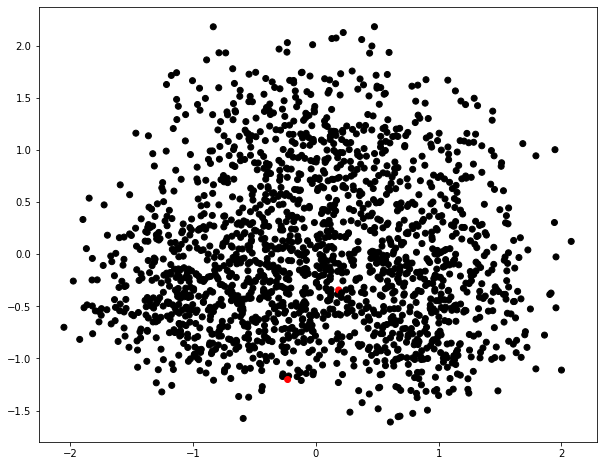

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
pcs = pca.fit_transform(w2v_doc_features)
labels = w2v_ap.labels_
print(len(set(labels)))
colors = np.where(labels == 0, 'r', 'k')
categories = list(flatten_corpus)
plt.figure(figsize=(10, 8))

x = pcs[:,0]
y = pcs[:,1]

# plt.scatter(x, y)
plt.scatter(x, y, c=colors)
# plt.annotate(categories, xy=(x+1e-2, y+1e-2))

# for i in range(len(labels)):
#     # label = labels[i]
#     # color = 'orange' if label == 0 else 'blue' if label == 1 else 'green'
#     # color = 'orange'
#     annotation_label = categories[i]
#     x, y = pcs[i]
#     plt.scatter(x, y, c=labels[i], edgecolors='k')
#     plt.annotate(annotation_label, xy=(x+1e-2, y+1e-2), xytext=(0, 0), 
#                  textcoords='offset points')

100


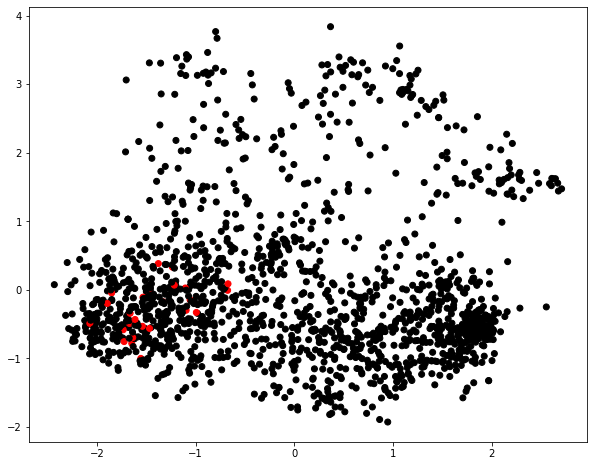

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
pcs = pca.fit_transform(ft_doc_features)
labels = ft_ap.labels_
print(len(set(labels)))
colors = np.where(labels == 1, 'r', 'k')
categories = list(flatten_corpus)
plt.figure(figsize=(10, 8))

x = pcs[:,0]
y = pcs[:,1]

plt.scatter(x, y, c=colors)